# Market Mix Modeling: Capstone 3 Project<br>

# EDA

## Table of Contents
* [A: Load & Inspect File](#a)
* [B: Explore Media Investments](#b)
* [C: Time-Series Plots](#c)
* [D: Explore Relationships](#d)
* [E: Save Data](#e)

## A: Load & Inspect Files <a class="anchor" id="a"></a>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import datetime
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import qgrid
def view(df_test):
    return qgrid.show_grid(df_test, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

In [2]:
#Open files

sales_df = pd.read_pickle('../b_Data/Sales.pkl')
media_df = pd.read_pickle('../b_Data/Media.pkl')

In [3]:
#Inspect
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578079 entries, 0 to 1578078
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Date                 1578079 non-null  datetime64[ns]
 1   Sales_name           1578079 non-null  object        
 2   units                1578079 non-null  int64         
 3   product_category     1578079 non-null  object        
 4   product_subcategory  1578079 non-null  object        
 5   product_vertical     1578079 non-null  object        
 6   revenue_USD          1578079 non-null  float64       
 7   mrp_USD              1578079 non-null  float64       
 8   discount_USD         1578079 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 108.4+ MB


In [4]:
media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year                   12 non-null     int64         
 1   Month                  12 non-null     int64         
 2   Total_Investment_USD   12 non-null     float64       
 3   TV_USD                 12 non-null     float64       
 4   Digital_USD            12 non-null     float64       
 5   Sponsorship_USD        12 non-null     float64       
 6   Content_Marketing_USD  12 non-null     float64       
 7   Online_Marketing_USD   12 non-null     float64       
 8   Affiliates_USD         12 non-null     float64       
 9   SEM_USD                12 non-null     float64       
 10  Radio_USD              12 non-null     float64       
 11  Other_USD              12 non-null     float64       
 12  Day                    12 non-null     int64         
 13  Date   

In [5]:
sales_df.head()

,Date,Sales_name,units,product_category,product_subcategory,product_vertical,revenue_USD,mrp_USD,discount_USD
0,2015-07-01,No Promotion,1,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,49.55,59.50,9.94
1,2015-07-01,No Promotion,1,EntertainmentSmall,Speaker,LaptopSpeaker,5.05,6.52,1.47
2,2015-07-01,No Promotion,1,GamingHardware,GamingAccessory,GamePad,32.58,130.38,97.80
3,2015-07-01,No Promotion,1,EntertainmentSmall,TVVideoSmall,RemoteControl,2.27,11.41,9.14
4,2015-07-01,No Promotion,1,EntertainmentSmall,TVVideoSmall,RemoteControl,1.61,11.41,9.80


In [6]:
media_df.head()

,Year,Month,Total_Investment_USD,TV_USD,Digital_USD,Sponsorship_USD,Content_Marketing_USD,Online_Marketing_USD,Affiliates_USD,SEM_USD,Radio_USD,Other_USD,Day,Date
0,2015,7,278730.0,3260.0,40750.0,120620.0,0.0,21190.0,8150.0,81500.0,0.0,0.0,1,2015-07-01
1,2015,8,83130.0,0.0,21190.0,17930.0,0.0,1630.0,1630.0,40750.0,0.0,0.0,1,2015-08-01
2,2015,9,1569690.0,63570.0,22820.0,1023640.0,9780.0,267320.0,81500.0,101060.0,0.0,0.0,1,2015-09-01
3,2015,10,2774260.0,99430.0,205380.0,1380610.0,55420.0,397720.0,114100.0,519970.0,0.0,0.0,1,2015-10-01
4,2015,11,834560.0,68460.0,21190.0,231460.0,3260.0,319480.0,107580.0,84760.0,0.0,0.0,1,2015-11-01


In [7]:
#Review descriptives
sales_df.describe()

,units,revenue_USD,mrp_USD,discount_USD
count,1.578079e+06,1.578079e+06,1.578079e+06,1.578079e+06
mean,1.021809e+00,4.012449e+01,6.940196e+01,2.927810e+01
std,2.493014e-01,9.193246e+01,1.433372e+02,6.971163e+01
min,1.000000e+00,1.600000e-01,8.000000e-01,0.000000e+00
25%,1.000000e+00,5.530000e+00,1.304000e+01,5.050000e+00
50%,1.000000e+00,1.221000e+01,2.608000e+01,1.141000e+01
75%,1.000000e+00,3.257000e+01,5.703000e+01,2.525000e+01
max,5.000000e+01,3.699240e+03,6.846000e+03,6.819150e+03


In [8]:
#Create monthly aggregate df from sales_df to compare to media
sales_df['Month'] = sales_df['Date'].dt.month
monthly_sales = sales_df[['revenue_USD','mrp_USD','discount_USD','Month']].groupby(['Month']).sum()
monthly_sales.head()

,revenue_USD,mrp_USD,discount_USD
Month,,,
1,6.159027e+06,1.095367e+07,4.794751e+06
2,5.240009e+06,9.141739e+06,3.901805e+06
3,6.340691e+06,1.102934e+07,4.688767e+06
4,5.253424e+06,8.729151e+06,3.475850e+06
5,6.399138e+06,1.077396e+07,4.374942e+06


In [9]:
monthly_sales.describe()

,revenue_USD,mrp_USD,discount_USD
count,1.200000e+01,1.200000e+01,1.200000e+01
mean,5.276635e+06,9.126814e+06,3.850263e+06
std,2.115253e+06,3.812022e+06,1.722512e+06
min,6.548130e+03,1.058679e+04,4.038810e+03
25%,5.055699e+06,8.421738e+06,3.345561e+06
50%,5.706225e+06,9.957852e+06,4.138374e+06
75%,6.415640e+06,1.097258e+07,4.715263e+06
max,7.965730e+06,1.489521e+07,6.929569e+06


In [10]:
media_df.describe()

,Year,Month,Total_Investment_USD,TV_USD,Digital_USD,Sponsorship_USD,Content_Marketing_USD,Online_Marketing_USD,Affiliates_USD,SEM_USD,Radio_USD,Other_USD,Day
count,12.000000,12.000000,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,2015.500000,6.500000,1.149965e+06,60310.000000,40478.333333,4.963350e+05,10866.666667,263109.166667,83401.666667,123744.166667,6384.166667,65200.000000,1.0
std,0.522233,3.605551,7.258999e+05,43814.735172,53304.345692,4.275865e+05,15390.473047,137847.332711,41677.919996,129639.197738,13431.587233,140752.604303,0.0
min,2015.000000,1.000000,8.313000e+04,0.000000,8150.000000,1.793000e+04,0.000000,1630.000000,1630.000000,40750.000000,0.000000,0.000000,1.0
25%,2015.000000,3.750000,7.624325e+05,26487.500000,19560.000000,1.731875e+05,0.000000,233090.000000,72535.000000,68460.000000,0.000000,0.000000,1.0
50%,2015.500000,6.500000,1.067650e+06,66015.000000,22820.000000,4.017950e+05,8150.000000,309700.000000,103505.000000,83130.000000,0.000000,0.000000,1.0
75%,2016.000000,9.250000,1.584768e+06,85575.000000,35860.000000,7.396125e+05,13447.500000,368380.000000,110840.000000,103912.500000,3667.500000,20375.000000,1.0
max,2016.000000,12.000000,2.774260e+06,151590.000000,205380.000000,1.380610e+06,55420.000000,397720.000000,120620.000000,519970.000000,44010.000000,441730.000000,1.0


## B. Explore Media Spend Composition <a class="anchor" id="b"></a>

In [11]:
media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year                   12 non-null     int64         
 1   Month                  12 non-null     int64         
 2   Total_Investment_USD   12 non-null     float64       
 3   TV_USD                 12 non-null     float64       
 4   Digital_USD            12 non-null     float64       
 5   Sponsorship_USD        12 non-null     float64       
 6   Content_Marketing_USD  12 non-null     float64       
 7   Online_Marketing_USD   12 non-null     float64       
 8   Affiliates_USD         12 non-null     float64       
 9   SEM_USD                12 non-null     float64       
 10  Radio_USD              12 non-null     float64       
 11  Other_USD              12 non-null     float64       
 12  Day                    12 non-null     int64         
 13  Date   

In [12]:
#Means for values of media_df sorted
round(media_df.mean(),2).sort_values()

Day                            1.00
Month                          6.50
Year                        2015.50
Radio_USD                   6384.17
Content_Marketing_USD      10866.67
Digital_USD                40478.33
TV_USD                     60310.00
Other_USD                  65200.00
Affiliates_USD             83401.67
SEM_USD                   123744.17
Online_Marketing_USD      263109.17
Sponsorship_USD           496335.00
Total_Investment_USD     1149965.00
dtype: float64

In [13]:
media_df.columns

Index(['Year', 'Month', 'Total_Investment_USD', 'TV_USD', 'Digital_USD',
       'Sponsorship_USD', 'Content_Marketing_USD', 'Online_Marketing_USD',
       'Affiliates_USD', 'SEM_USD', 'Radio_USD', 'Other_USD', 'Day', 'Date'],
      dtype='object')

In [14]:
#View monthly ad spend by channel crosstab
#Create Month_Year column for labels
media_df['Month_Year'] = media_df['Date'].dt.strftime('%Y-%m')

media_df_perc = media_df[['Month_Year','Total_Investment_USD']].copy()
col_list = ['TV_USD', 'Digital_USD','Sponsorship_USD','Content_Marketing_USD', 'Online_Marketing_USD','Affiliates_USD', 'SEM_USD', 'Radio_USD','Other_USD']

for i in col_list:
    media_df_perc[i + '_perc'] = round((media_df[i] / media_df['Total_Investment_USD'] * 100),2)
                         
media_df_perc.T         

,0,1,2,3,4,5,6,7,8,9,10,11
Month_Year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06
Total_Investment_USD,278730,83130,1.56969e+06,2.77426e+06,834560,1.73921e+06,1.20946e+06,784030,1.63e+06,925840,1.27303e+06,697640
TV_USD_perc,1.17,0,4.05,3.58,8.2,5.06,5.93,5.41,9.3,9.15,1.79,3.97
Digital_USD_perc,14.62,25.49,1.45,7.4,2.54,2.91,0.67,3.95,2.1,1.58,1.02,3.27
Sponsorship_USD_perc,43.27,21.57,65.21,49.76,27.73,53.14,5.66,24.32,41.6,42.78,40.59,58.41
Content_Marketing_USD_perc,0,0,0.62,2,0.39,1.03,1.21,1.25,0.4,0,1.02,0
Online_Marketing_USD_perc,7.6,1.96,17.03,14.34,38.28,21.09,30.86,41.37,18.4,29.05,30.35,18.69
Affiliates_USD_perc,2.92,1.96,5.19,4.11,12.89,6.37,9.97,13.51,6.2,10.04,8.71,6.54
SEM_USD_perc,29.24,49.02,6.44,18.74,10.16,10.5,5.66,10.19,5.2,7.39,8.83,8.64
Radio_USD_perc,0,0,0,0,0,0,3.64,0,0.9,0,1.41,0


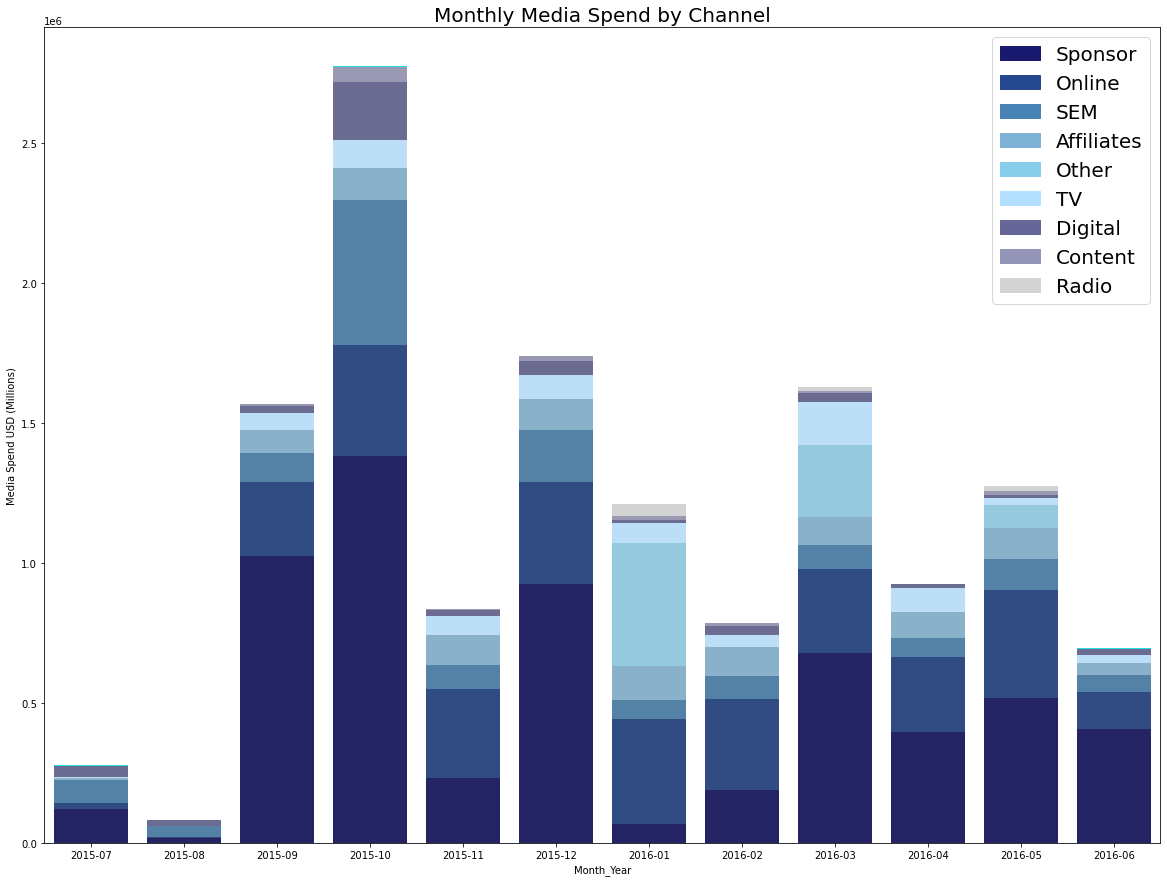

In [15]:
#View monthly ad spend by channel - visual

#Set figure size
plt.figure(figsize=(20,15))

#Create bottoms (this will be the bottom boundary for each stack)
bottom_2 = np.add(media_df['Sponsorship_USD'],media_df['Online_Marketing_USD'])
bottom_3 = media_df['Sponsorship_USD']+ media_df['Online_Marketing_USD'] + media_df['SEM_USD']
bottom_4 = media_df['Sponsorship_USD'] + media_df['Online_Marketing_USD'] + media_df['SEM_USD'] + media_df['Affiliates_USD']
bottom_5 = media_df['Sponsorship_USD'] + media_df['Online_Marketing_USD'] + media_df['SEM_USD'] + media_df['Affiliates_USD'] + media_df['Other_USD']
bottom_6 = media_df['Sponsorship_USD'] + media_df['Online_Marketing_USD'] + media_df['SEM_USD'] + media_df['Affiliates_USD'] + media_df['Other_USD'] + media_df['TV_USD']
bottom_7 = media_df['Sponsorship_USD'] + media_df['Online_Marketing_USD'] + media_df['SEM_USD'] + media_df['Affiliates_USD'] + media_df['Other_USD'] + media_df['TV_USD'] + media_df['Digital_USD']
bottom_8 = media_df['Sponsorship_USD'] + media_df['Online_Marketing_USD'] + media_df['SEM_USD'] + media_df['Affiliates_USD'] + media_df['Other_USD'] + media_df['TV_USD'] + media_df['Digital_USD'] + media_df['Content_Marketing_USD']

bar1 = sns.barplot(x='Month_Year',  y='Total_Investment_USD', data=media_df, color = '#00ffff')
bar2 = sns.barplot(x='Month_Year', y='Sponsorship_USD', data=media_df, color='midnightblue')
bar3 = sns.barplot(x='Month_Year', y='Online_Marketing_USD', bottom=media_df['Sponsorship_USD'], data=media_df, color='#24478f')
bar4 = sns.barplot(x='Month_Year', y='SEM_USD', data=media_df, bottom=bottom_2, color='steelblue')
bar5 = sns.barplot(x='Month_Year', y='Affiliates_USD', data=media_df, bottom=bottom_3, color='#7FB3D5')
bar6 = sns.barplot(x='Month_Year', y='Other_USD', data=media_df, bottom=bottom_4, color='skyblue')
bar7 = sns.barplot(x='Month_Year', y='TV_USD', data=media_df, bottom=bottom_5, color='#b3e0ff')
bar8 = sns.barplot(x='Month_Year', y='Digital_USD',bottom=bottom_6, data=media_df, color='#666699')
bar9 = sns.barplot(x='Month_Year', y='Content_Marketing_USD',bottom=bottom_7, data=media_df, color='#9494b8')
bar10 =sns.barplot(x='Month_Year', y='Radio_USD',bottom=bottom_8, data=media_df, color='lightgray')

# add legend
Sponsor_bar = mpatches.Patch(color='midnightblue', label='Sponsor')
Online_bar = mpatches.Patch(color='#24478f', label='Online')
SEM_bar = mpatches.Patch(color='steelblue', label='SEM')
Affiliates_bar = mpatches.Patch(color='#7FB3D5', label='Affiliates')
Other_bar = mpatches.Patch(color='skyblue', label='Other')
TV_bar = mpatches.Patch(color='#b3e0ff', label='TV')
Digital_bar = mpatches.Patch(color='#666699', label='Digital')
Content_bar = mpatches.Patch(color='#9494b8', label='Content')
Radio_bar = mpatches.Patch(color='lightgray', label='Radio')

#Digital_bar = mpatches.Patch(color='pink', label='Digital')
plt.legend(handles=[Sponsor_bar,Online_bar,SEM_bar,Affiliates_bar,Other_bar,TV_bar,Digital_bar,Content_bar,Radio_bar], fontsize=20)
plt.title('Monthly Media Spend by Channel',fontsize=20)
plt.ylabel('Media Spend USD (Millions)')

# show the graph
plt.show()



#### Notes: 
* Across the fiscal year, Sponsorships, Online Marketing, and SEM had the highest average monthly media spend.
* Sponsorships made up between 40% and 50% of the entire monthly media budget with the exception of that budget for Aug. 2015, Nov. 2015, Jan. 2016 and Feb. 2016 with Jan. 2016 being unusually low at 6%. 

## C. Time-Series Plots <a class="anchor" id="c"></a>

#### Revenue by Category and Month

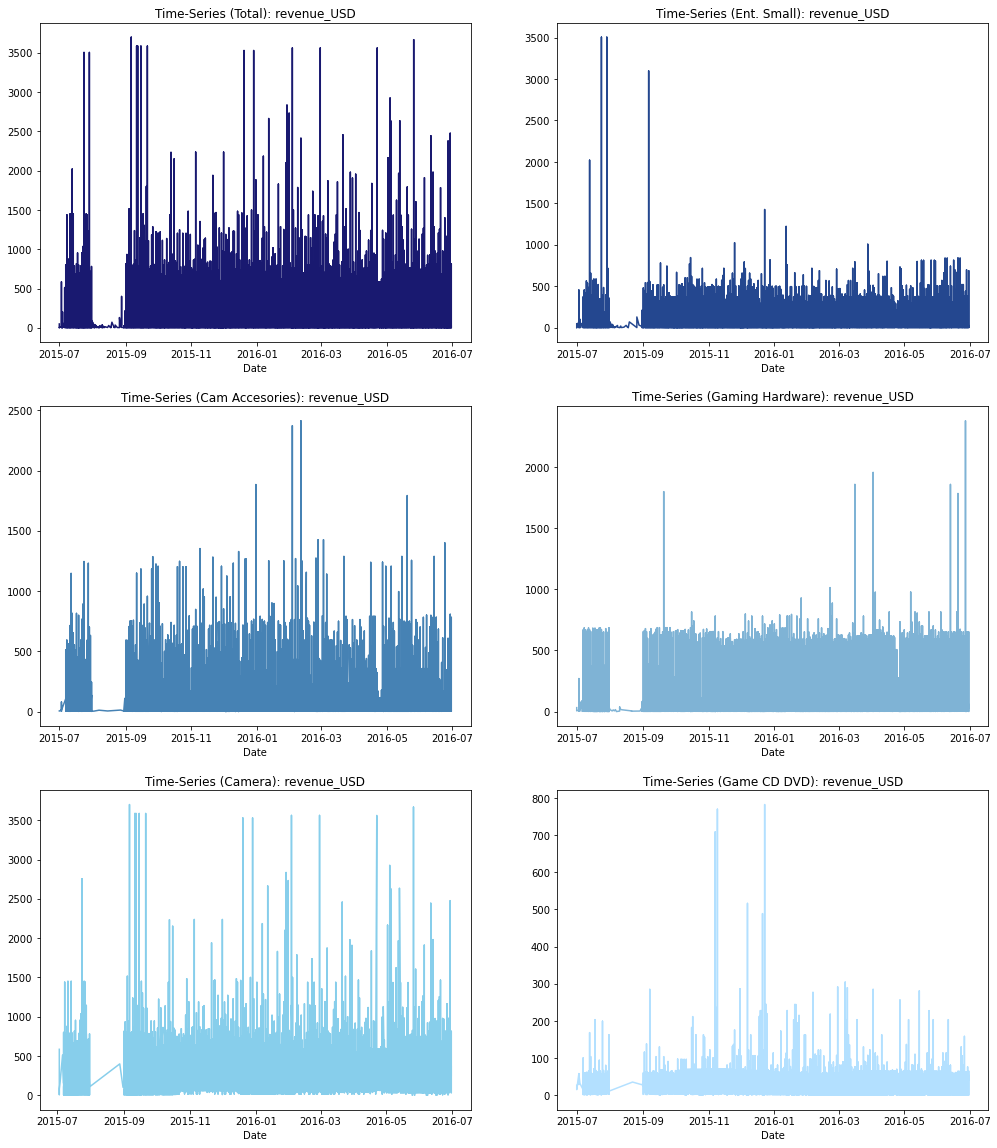

In [17]:
#'revenue_USD - Sales level'
y_col = 'revenue_USD'

#Create y values
y_total = sales_df[y_col]
Y_EntSmall = sales_df[sales_df['product_category']=='EntertainmentSmall'][y_col]
Y_CamAcc = sales_df[sales_df['product_category']=='CameraAccessory'][y_col]
Y_GamingHw = sales_df[sales_df['product_category']=='GamingHardware'][y_col]
Y_Camera = sales_df[sales_df['product_category']=='Camera'][y_col]
Y_GameCDDVD = sales_df[sales_df['product_category']=='GameCDDVD'][y_col]

#Create x values
X_EntSmall = sales_df[sales_df['product_category']=='EntertainmentSmall']['Date']
X_CamAcc = sales_df[sales_df['product_category']=='CameraAccessory']['Date']
X_GamingHw = sales_df[sales_df['product_category']=='GamingHardware']['Date']
X_Camera = sales_df[sales_df['product_category']=='Camera']['Date']
X_GameCDDVD = sales_df[sales_df['product_category']=='GameCDDVD']['Date']

#Create plots
plt.figure(figsize=(17,20))
plt.subplot(3,2,1)
plt.plot(sales_df['Date'], y_total, color='midnightblue', label='Total')
plt.xlabel('Date')
plt.title('Time-Series (Total): ' + y_col)

plt.subplot(3,2,2)
plt.plot(X_EntSmall, Y_EntSmall, color='#24478f', label='Ent. Small')
plt.xlabel('Date')
plt.title('Time-Series (Ent. Small): ' + y_col)

plt.subplot(3,2,3)
plt.plot(X_CamAcc, Y_CamAcc, color='steelblue', label='Cam Accessories')
plt.xlabel('Date')
plt.title('Time-Series (Cam Accesories): ' + y_col)

plt.subplot(3,2,4)
plt.plot(X_GamingHw, Y_GamingHw, color='#7FB3D5', label='Gaming Hardware')
plt.xlabel('Date')
plt.title('Time-Series (Gaming Hardware): ' + y_col)

plt.subplot(3,2,5)
plt.plot(X_Camera, Y_Camera, color='skyblue', label='Camera')
plt.xlabel('Date')
plt.title('Time-Series (Camera): ' + y_col)

plt.subplot(3,2,6)
plt.plot(X_GameCDDVD, Y_GameCDDVD, color='#b3e0ff', label='Game CDDVD')
plt.xlabel('Date')
plt.title('Time-Series (Game CD DVD): ' + y_col)

plt.show()

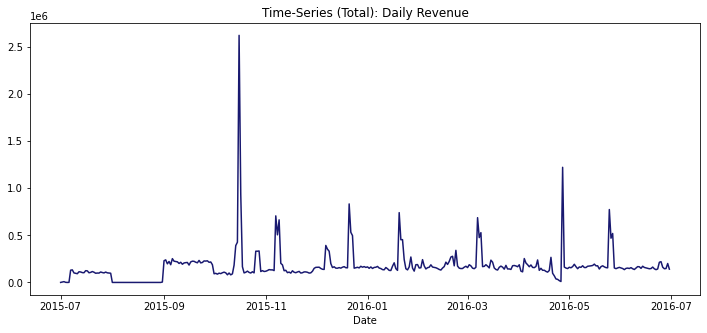

In [25]:
#'revenue_USD_day'

#get a daily revenue
daily_totals = sales_df[['revenue_USD','Date']].groupby(['Date']).sum().reset_index()

#Create plot
plt.figure(figsize=(12,5))
plt.plot(daily_totals['Date'], daily_totals['revenue_USD'], color='midnightblue', label='Total')
plt.xlabel('Date')
plt.title('Time-Series (Total): ' + 'Daily Revenue')

plt.show()

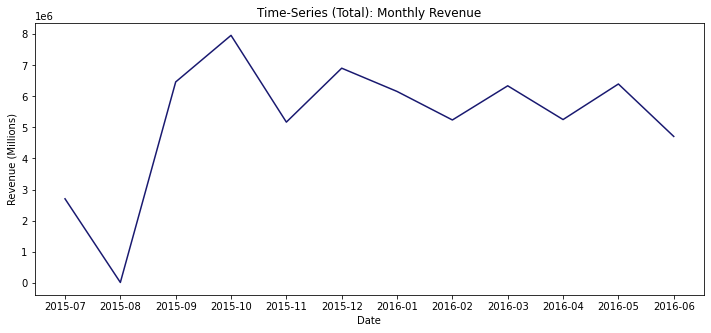

In [30]:
#'revenue_USD_Month'

#Create Month_Year variable
sales_df['Month_Year'] = sales_df['Date'].dt.strftime('%Y-%m')

#get a daily revenue
monthly_totals = sales_df[['revenue_USD','Month_Year']].groupby(['Month_Year']).sum().reset_index()

#Create plot
plt.figure(figsize=(12,5))
plt.plot(monthly_totals['Month_Year'], monthly_totals['revenue_USD'], color='midnightblue', label='Total')
plt.xlabel('Date')
plt.ylabel('Revenue (Millions)')
plt.title('Time-Series (Total): ' + 'Monthly Revenue')

plt.show()

#### Make Comparisons to Investments

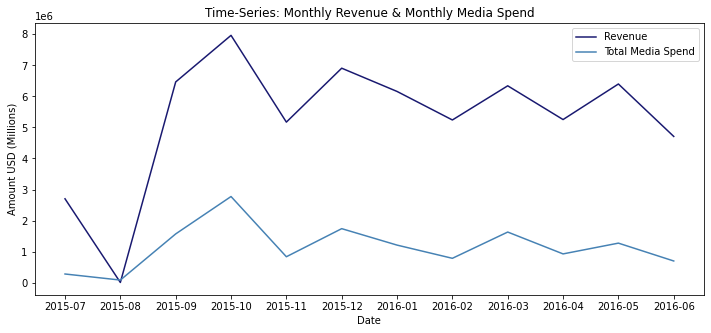

In [33]:
#Total Media Spend

#Create plot
plt.figure(figsize=(12,5))
plt.plot(monthly_totals['Month_Year'], monthly_totals['revenue_USD'], color='midnightblue', label='Revenue')
plt.plot(media_df['Month_Year'], media_df['Total_Investment_USD'], color='steelblue', label='Total Media Spend')
plt.xlabel('Date')
plt.ylabel('Amount USD (Millions)')
plt.title('Time-Series: Monthly Revenue & Monthly Media Spend')
plt.legend()
plt.show()

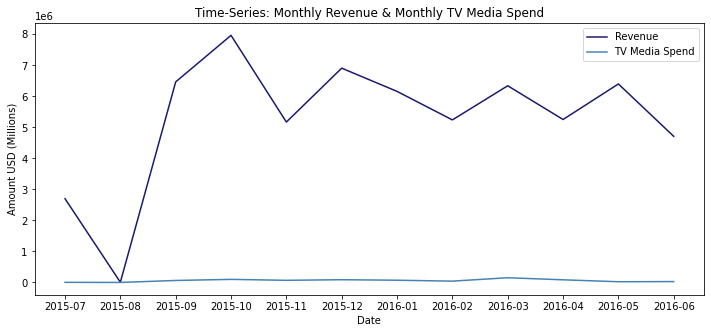

In [36]:
#TV Media Spend

#Create plot
plt.figure(figsize=(12,5))
plt.plot(monthly_totals['Month_Year'], monthly_totals['revenue_USD'], color='midnightblue', label='Revenue')
plt.plot(media_df['Month_Year'], media_df['TV_USD'], color='steelblue', label='TV Media Spend')
plt.xlabel('Date')
plt.ylabel('Amount USD (Millions)')
plt.title('Time-Series: Monthly Revenue & Monthly TV Media Spend')
plt.legend()
plt.show()

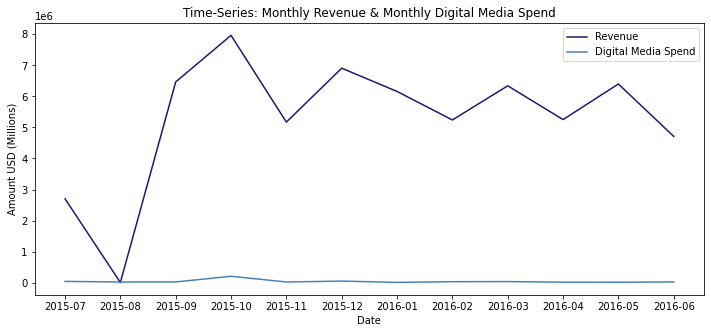

In [37]:
#Digital Media Spend

#Create plot
plt.figure(figsize=(12,5))
plt.plot(monthly_totals['Month_Year'], monthly_totals['revenue_USD'], color='midnightblue', label='Revenue')
plt.plot(media_df['Month_Year'], media_df['Digital_USD'], color='steelblue', label='Digital Media Spend')
plt.xlabel('Date')
plt.ylabel('Amount USD (Millions)')
plt.title('Time-Series: Monthly Revenue & Monthly Digital Media Spend')
plt.legend()
plt.show()

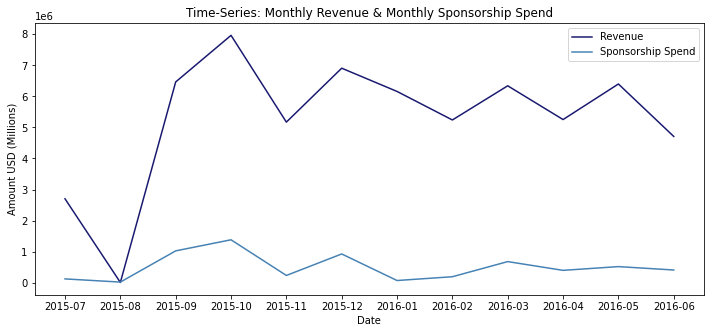

In [38]:
#Sponsorship Spend

#Create plot
plt.figure(figsize=(12,5))
plt.plot(monthly_totals['Month_Year'], monthly_totals['revenue_USD'], color='midnightblue', label='Revenue')
plt.plot(media_df['Month_Year'], media_df['Sponsorship_USD'], color='steelblue', label='Sponsorship Spend')
plt.xlabel('Date')
plt.ylabel('Amount USD (Millions)')
plt.title('Time-Series: Monthly Revenue & Monthly Sponsorship Spend')
plt.legend()
plt.show()

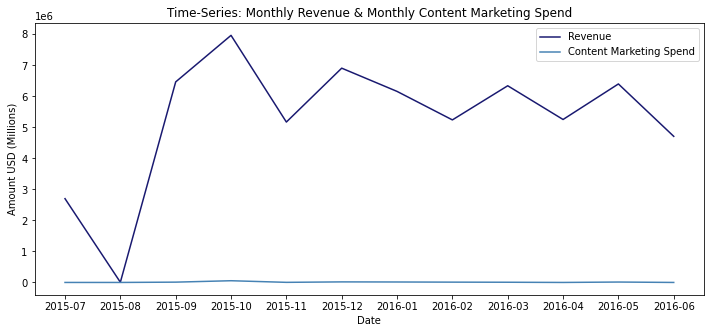

In [39]:
#Content Marketing Spend

#Create plot
plt.figure(figsize=(12,5))
plt.plot(monthly_totals['Month_Year'], monthly_totals['revenue_USD'], color='midnightblue', label='Revenue')
plt.plot(media_df['Month_Year'], media_df['Content_Marketing_USD'], color='steelblue', label='Content Marketing Spend')
plt.xlabel('Date')
plt.ylabel('Amount USD (Millions)')
plt.title('Time-Series: Monthly Revenue & Monthly Content Marketing Spend')
plt.legend()
plt.show()

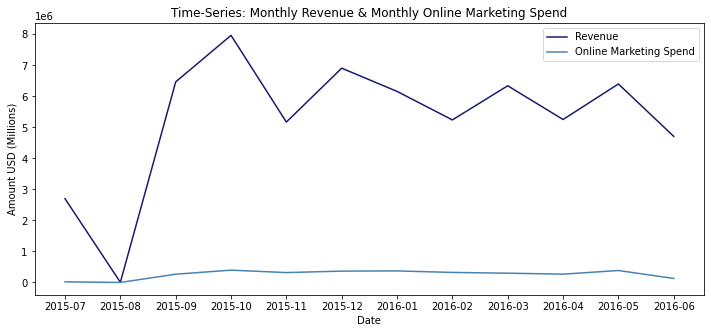

In [40]:
#Online Marketing Spend

#Create plot
plt.figure(figsize=(12,5))
plt.plot(monthly_totals['Month_Year'], monthly_totals['revenue_USD'], color='midnightblue', label='Revenue')
plt.plot(media_df['Month_Year'], media_df['Online_Marketing_USD'], color='steelblue', label='Online Marketing Spend')
plt.xlabel('Date')
plt.ylabel('Amount USD (Millions)')
plt.title('Time-Series: Monthly Revenue & Monthly Online Marketing Spend')
plt.legend()
plt.show()

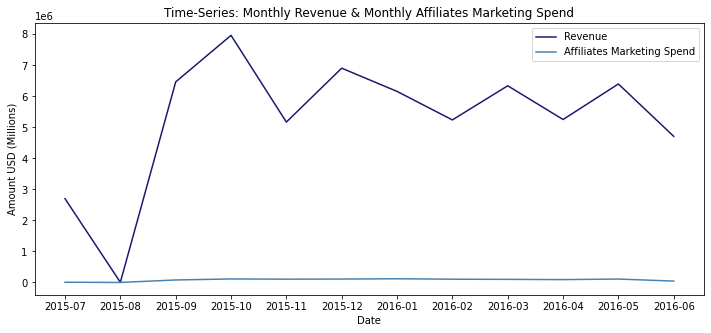

In [41]:
#Affiliates Marketing Spend

#Create plot
plt.figure(figsize=(12,5))
plt.plot(monthly_totals['Month_Year'], monthly_totals['revenue_USD'], color='midnightblue', label='Revenue')
plt.plot(media_df['Month_Year'], media_df['Affiliates_USD'], color='steelblue', label='Affiliates Marketing Spend')
plt.xlabel('Date')
plt.ylabel('Amount USD (Millions)')
plt.title('Time-Series: Monthly Revenue & Monthly Affiliates Marketing Spend')
plt.legend()
plt.show()

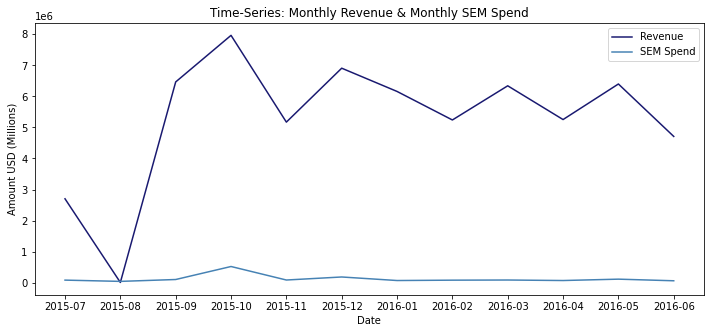

In [42]:
#SEM Spend

#Create plot
plt.figure(figsize=(12,5))
plt.plot(monthly_totals['Month_Year'], monthly_totals['revenue_USD'], color='midnightblue', label='Revenue')
plt.plot(media_df['Month_Year'], media_df['SEM_USD'], color='steelblue', label='SEM Spend')
plt.xlabel('Date')
plt.ylabel('Amount USD (Millions)')
plt.title('Time-Series: Monthly Revenue & Monthly SEM Spend')
plt.legend()
plt.show()

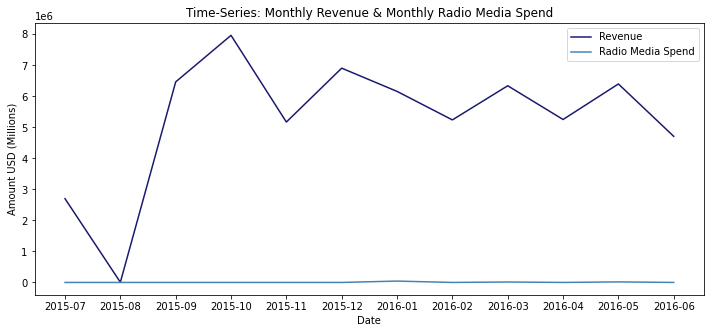

In [43]:
#Radio Media Spend

#Create plot
plt.figure(figsize=(12,5))
plt.plot(monthly_totals['Month_Year'], monthly_totals['revenue_USD'], color='midnightblue', label='Revenue')
plt.plot(media_df['Month_Year'], media_df['Radio_USD'], color='steelblue', label='Radio Media Spend')
plt.xlabel('Date')
plt.ylabel('Amount USD (Millions)')
plt.title('Time-Series: Monthly Revenue & Monthly Radio Media Spend')
plt.legend()
plt.show()

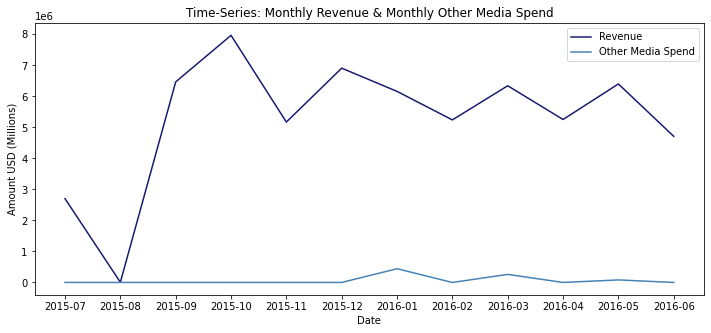

In [44]:
#Other Media Spend

#Create plot
plt.figure(figsize=(12,5))
plt.plot(monthly_totals['Month_Year'], monthly_totals['revenue_USD'], color='midnightblue', label='Revenue')
plt.plot(media_df['Month_Year'], media_df['Other_USD'], color='steelblue', label='Other Media Spend')
plt.xlabel('Date')
plt.ylabel('Amount USD (Millions)')
plt.title('Time-Series: Monthly Revenue & Monthly Other Media Spend')
plt.legend()
plt.show()

#### Time-series of promotions

In [54]:
sales_df['Sales_name'].value_counts(normalize=True)

No Promotion                 0.818616
Daussera sale                0.059197
Christmas & New Year Sale    0.026932
Big Diwali Sale              0.026846
Pacman                       0.016194
BSD-5                        0.016182
Republic Day                 0.014424
FHSD                         0.007472
Valentine's Day              0.005116
BED                          0.004963
Eid & Rathayatra sale        0.004045
Rakshabandhan Sale           0.000010
Independence Sale            0.000003
Name: Sales_name, dtype: float64

In [69]:
sales_df.groupby('Month_Year')['Sales_name'].value_counts()

Month_Year  Sales_name               
2015-07     No Promotion                  77090
            Eid & Rathayatra sale          6384
2015-08     No Promotion                    234
            Rakshabandhan Sale               15
            Independence Sale                 5
2015-09     No Promotion                 195781
2015-10     No Promotion                 106124
            Daussera sale                 93417
2015-11     No Promotion                  81671
            Big Diwali Sale               42365
2015-12     No Promotion                 123239
            Christmas & New Year Sale     29543
2016-01     No Promotion                 103204
            Republic Day                  22762
            Christmas & New Year Sale     12958
2016-02     No Promotion                 111575
            FHSD                          11792
            Valentine's Day                8074
            BED                            7832
2016-03     No Promotion                 122208
  

In [55]:
#Create variable to indicate whether the sale used a promotion
sales_df['Promotion'] = np.where((sales_df['Sales_name'] =='No Promotion'),0,1)
sales_df.head()

,Date,Sales_name,units,product_category,product_subcategory,product_vertical,revenue_USD,mrp_USD,discount_USD,Month,Month_Year,Promotion
0,2015-07-01,No Promotion,1,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,49.55,59.50,9.94,7,2015-07,0
1,2015-07-01,No Promotion,1,EntertainmentSmall,Speaker,LaptopSpeaker,5.05,6.52,1.47,7,2015-07,0
2,2015-07-01,No Promotion,1,GamingHardware,GamingAccessory,GamePad,32.58,130.38,97.80,7,2015-07,0
3,2015-07-01,No Promotion,1,EntertainmentSmall,TVVideoSmall,RemoteControl,2.27,11.41,9.14,7,2015-07,0
4,2015-07-01,No Promotion,1,EntertainmentSmall,TVVideoSmall,RemoteControl,1.61,11.41,9.80,7,2015-07,0


In [56]:
#See percentage of sales with promotion
sales_df['Promotion'].value_counts(normalize=True)

0    0.818616
1    0.181384
Name: Promotion, dtype: float64

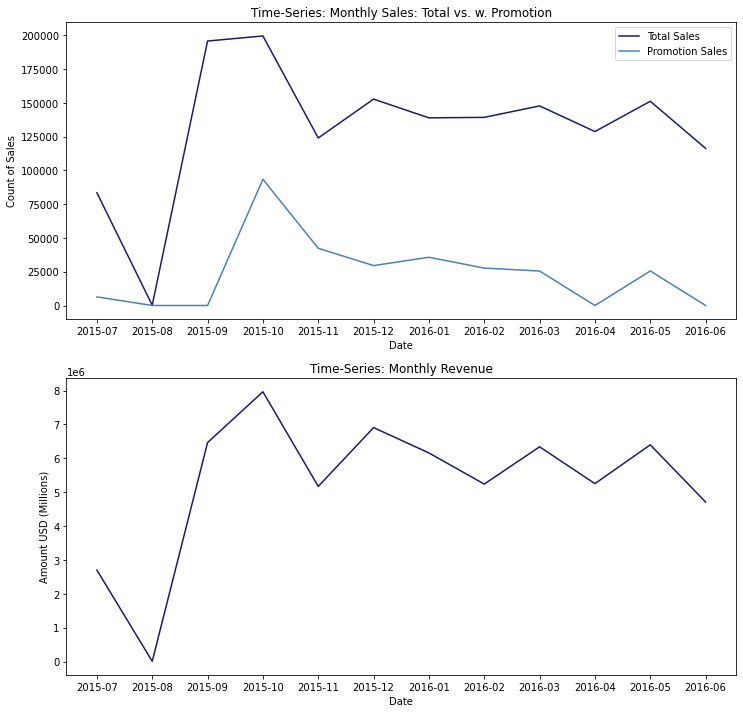

In [66]:
#See monthly promotions sales & promotion trends

#create a sales count var
sales_df['Sales_Count'] = 1

#Calculate a daily sales df
monthly_sales = sales_df[['Promotion','Sales_Count','Month_Year']].groupby(['Month_Year']).sum().reset_index()

#Create plot
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.plot(monthly_sales['Month_Year'], monthly_sales['Sales_Count'], color='midnightblue', label='Total Sales')
plt.plot(monthly_sales['Month_Year'], monthly_sales['Promotion'], color='steelblue', label='Promotion Sales')
plt.xlabel('Date')
plt.ylabel('Count of Sales')
plt.title('Time-Series: Monthly Sales: Total vs. w. Promotion')
plt.legend()

plt.subplot(2,1,2)
plt.plot(monthly_totals['Month_Year'], monthly_totals['revenue_USD'], color='midnightblue', label='Revenue')
plt.xlabel('Date')
plt.ylabel('Amount USD (Millions)')
plt.title('Time-Series: Monthly Revenue')

plt.show()


#### Notes: 

* Revenue was around 3M in July of 2015 and then dropped to under 1M in August. Revenue then peaked between September and October at nearly 8M and then dropped a bit but remain fairly consistent between 5M-7M for the remainder of the year.
* That trend was similar for the total media spend which appears to have been most impacted by the monthly sponsorship spend.
* The number of sales due to promotions per month also appears to have a similar trend to monthly revenue particularly in October which corresponds to Daussera sales and between April and June.


## D: Explore Relationships <a class="anchor" id="d"></a>

#### Scatterplots

In [74]:
media_df.columns

Index(['Year', 'Month', 'Total_Investment_USD', 'TV_USD', 'Digital_USD',
       'Sponsorship_USD', 'Content_Marketing_USD', 'Online_Marketing_USD',
       'Affiliates_USD', 'SEM_USD', 'Radio_USD', 'Other_USD', 'Day', 'Date',
       'Month_Year'],
      dtype='object')

In [76]:
#Create merged monthly dataframe

columns = ['Total_Investment_USD', 'TV_USD', 'Digital_USD','Sponsorship_USD', 'Content_Marketing_USD', 
           'Online_Marketing_USD','Affiliates_USD', 'SEM_USD', 'Radio_USD', 'Other_USD','Month_Year']

media_df_merge = media_df[columns].copy()

monthly_merge = monthly_totals.merge(media_df_merge, on='Month_Year')
monthly_merge = monthly_merge.merge(monthly_sales, on='Month_Year')
monthly_merge

,Month_Year,revenue_USD,Total_Investment_USD,TV_USD,Digital_USD,Sponsorship_USD,Content_Marketing_USD,Online_Marketing_USD,Affiliates_USD,SEM_USD,Radio_USD,Other_USD,Promotion,Sales_Count
0,2015-07,2.701174e+06,278730.0,3260.0,40750.0,120620.0,0.0,21190.0,8150.0,81500.0,0.0,0.0,6384,83474
1,2015-08,6.548130e+03,83130.0,0.0,21190.0,17930.0,0.0,1630.0,1630.0,40750.0,0.0,0.0,20,254
2,2015-09,6.465145e+06,1569690.0,63570.0,22820.0,1023640.0,9780.0,267320.0,81500.0,101060.0,0.0,0.0,0,195781
3,2015-10,7.965730e+06,2774260.0,99430.0,205380.0,1380610.0,55420.0,397720.0,114100.0,519970.0,0.0,0.0,93417,199541
4,2015-11,5.171034e+06,834560.0,68460.0,21190.0,231460.0,3260.0,319480.0,107580.0,84760.0,0.0,0.0,42365,124036
5,2015-12,6.908004e+06,1739210.0,88020.0,50530.0,924210.0,17930.0,366750.0,110840.0,182560.0,0.0,0.0,29543,152782
6,2016-01,6.159027e+06,1209460.0,71720.0,8150.0,68460.0,14670.0,373270.0,120620.0,68460.0,44010.0,441730.0,35720,138924
7,2016-02,5.240009e+06,784030.0,42380.0,30970.0,190710.0,9780.0,324370.0,105950.0,79870.0,0.0,0.0,27698,139273
8,2016-03,6.340691e+06,1630000.0,151590.0,34230.0,678080.0,6520.0,299920.0,101060.0,84760.0,14670.0,259170.0,25537,147745
9,2016-04,5.253424e+06,925840.0,84760.0,14670.0,396090.0,0.0,268950.0,92910.0,68460.0,0.0,0.0,0,128773


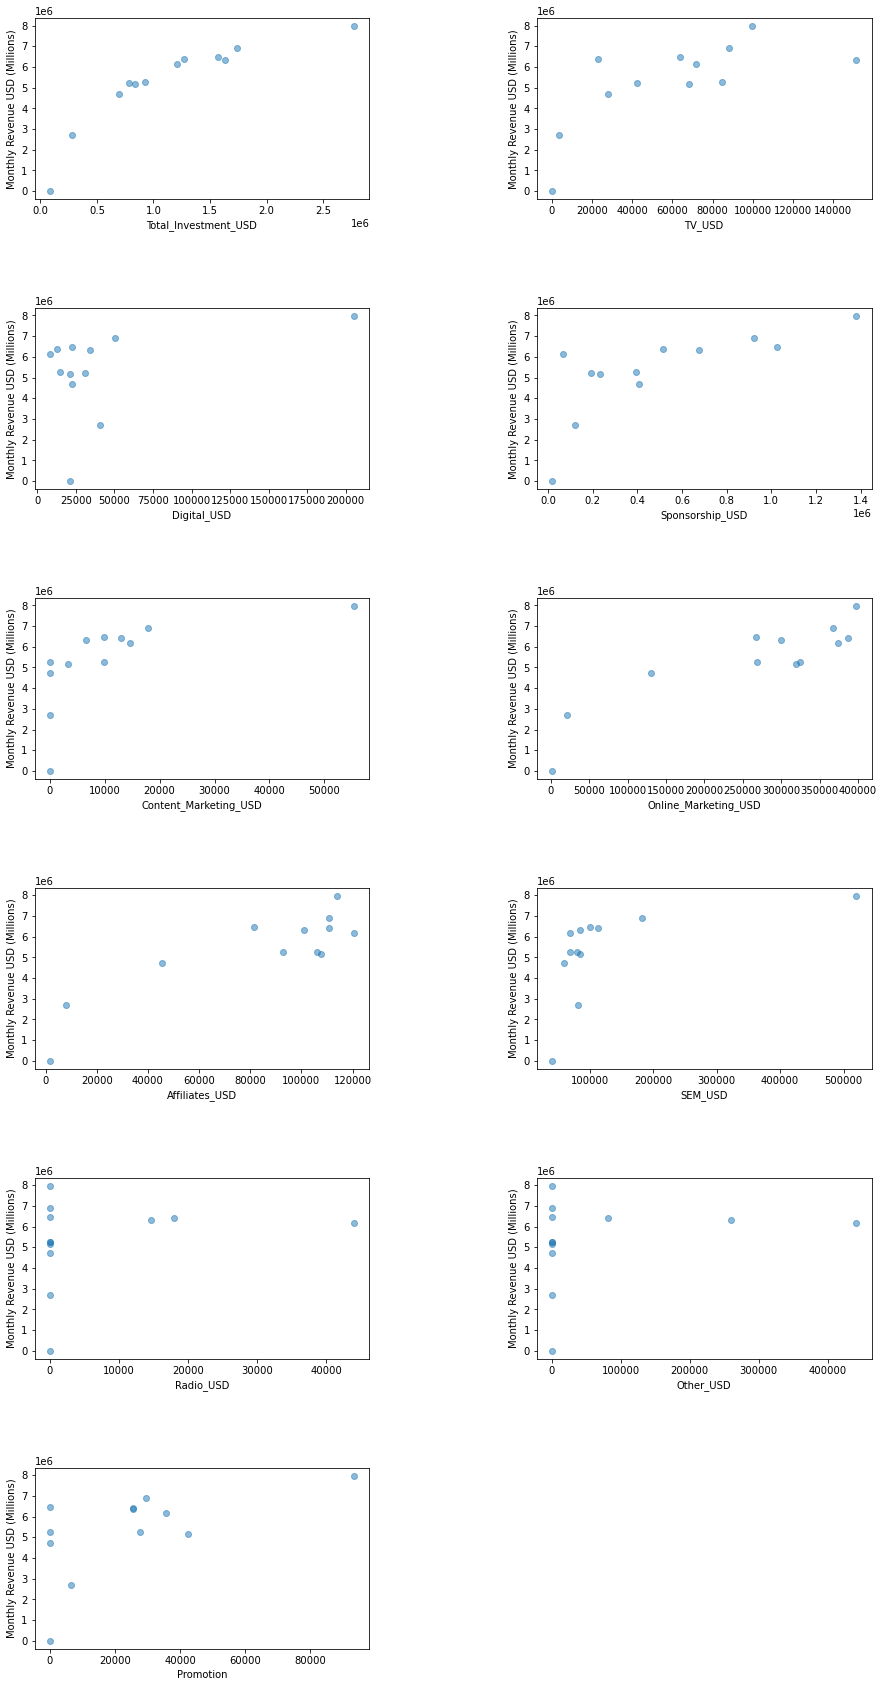

In [87]:
# scatterplots fuction adapted from Springboard Data Science Guided Capstone

def scatterplots(columns, ncol=None, figsize=(15,30)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'revenue_USD', data=monthly_merge, alpha=0.5)
        ax.set(xlabel=col, ylabel='Monthly Revenue USD (Millions)')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
#Create list of features from monthly media channels and promotions
features = monthly_merge.columns.drop(['Month_Year','revenue_USD','Sales_Count'])

#Create scatterplots
scatterplots(features, ncol=2)

#### Correlations

In [92]:
monthly_merge.corr().sort_values(by='revenue_USD', ascending=False)

,revenue_USD,Total_Investment_USD,TV_USD,Digital_USD,Sponsorship_USD,Content_Marketing_USD,Online_Marketing_USD,Affiliates_USD,SEM_USD,Radio_USD,Other_USD,Promotion,Sales_Count
revenue_USD,1.000000,0.870566,0.688464,0.392510,0.715858,0.624741,0.897520,0.876556,0.537298,0.238607,0.231155,0.582898,0.961487
Sales_Count,0.961487,0.840966,0.604821,0.404434,0.757240,0.601795,0.804085,0.776970,0.531750,0.119298,0.112771,0.503662,1.000000
Online_Marketing_USD,0.897520,0.753265,0.625422,0.265926,0.495404,0.582987,1.000000,0.988907,0.435220,0.373022,0.319748,0.642384,0.804085
Affiliates_USD,0.876556,0.694639,0.669278,0.188341,0.419455,0.495040,0.988907,1.000000,0.347755,0.387962,0.360352,0.594252,0.776970
Total_Investment_USD,0.870566,1.000000,0.710071,0.708917,0.899121,0.860018,0.753265,0.694639,0.811581,0.110649,0.143004,0.733880,0.840966
Sponsorship_USD,0.715858,0.899121,0.549132,0.694983,1.000000,0.734325,0.495404,0.419455,0.771471,-0.250088,-0.211838,0.498302,0.757240
TV_USD,0.688464,0.710071,1.000000,0.306223,0.549132,0.380395,0.625422,0.669278,0.350349,0.180587,0.377988,0.442610,0.604821
Content_Marketing_USD,0.624741,0.860018,0.380395,0.899553,0.734325,1.000000,0.582987,0.495040,0.957893,0.062706,0.030662,0.884970,0.601795
Promotion,0.582898,0.733880,0.442610,0.799487,0.498302,0.884970,0.642384,0.594252,0.843675,0.145334,0.139703,1.000000,0.503662
SEM_USD,0.537298,0.811581,0.350349,0.973189,0.771471,0.957893,0.435220,0.347755,1.000000,-0.167439,-0.176582,0.843675,0.531750


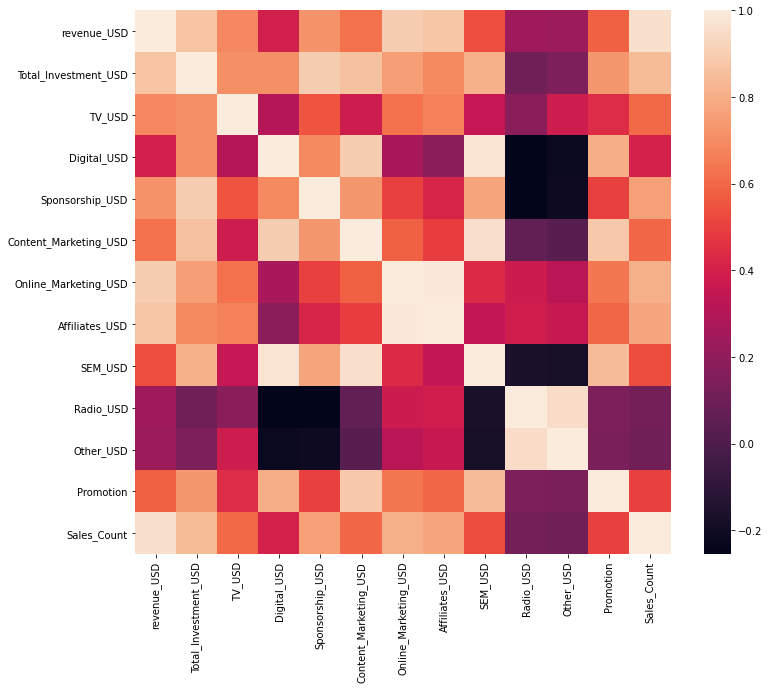

In [88]:
plt.subplots(figsize=(12,10))
sns.heatmap(monthly_merge.corr());

#### Notes:
* There appears to be a relationship between Revenue and Total Media Investment, TV Media Spend, Sponsorship spend, online marketing, and Affiliates spend as well as Content Marketing spend, SEM spend, and sales from a promotion to a less extent. 
* Similar to the scatterplot, the features most correlated with monthly revenue are online marketing spend (.9), affiliates spend, the total media investment (.87), Sponsorship media spend, (.72) and TV media spend (.69).
* Some of the features are also highly correlated which may increase standard errors and result in challenges identifying which factors are most highly affecting sales revenue. This is something we should address in feature engineering.

## E: Save Data <a class="anchor" id="e"></a>

In [96]:
#Save df test to pickle.
monthly_merge.to_pickle('../b_Data/monthly_merged.pkl')